In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [63]:
from scipy.io import wavfile

In [123]:
sample_rate, samples = wavfile.read('Alesis-Fusion-Bright-Acoustic-Piano-C2.wav')

C:\Users\11007098\Documents\py\WinPython\python-3.6.5.amd64\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [124]:
times.shape, frequencies.shape, spectrogram.shape, np.mean(spectrogram)

((634,), (129,), (129, 634), 1079.8762)

In [125]:
frequencies[:20]

array([    0.      ,   172.265625,   344.53125 ,   516.796875,
         689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
        1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
        2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
        2756.25    ,  2928.515625,  3100.78125 ,  3273.046875])

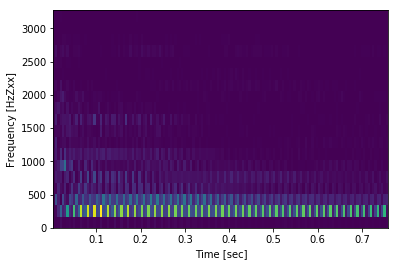

In [126]:
length = 150
freq = 20
frequencies, times, spectrogram = signal.spectrogram(samples[:,1], sample_rate)
amp = np.max(spectrogram)
spectrogram_clean = np.where(np.abs(spectrogram) >= amp/500, spectrogram, 0)
plt.pcolormesh(times[:length], frequencies[:freq], spectrogram_clean[:freq,:length])
#plt.imshow(spectrogram)
plt.ylabel('Frequency [HzZxx]')
plt.xlabel('Time [sec]')
plt.show()

In [130]:
Zxx.shape

(129, 1112)

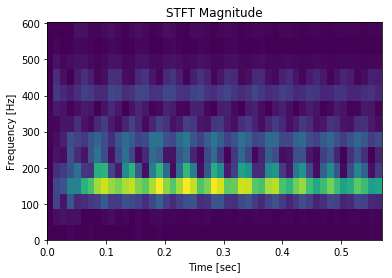

In [195]:
nperseg = 1024 #256
length = int(200*256/nperseg)
freq = 15
f, t, Zxx0 = signal.stft(samples[:,0], sample_rate, nperseg=nperseg)
f, t, Zxx1 = signal.stft(samples[:,1], sample_rate, nperseg=nperseg)
plt.pcolormesh(t[:length], f[:freq], np.abs(Zxx0[:freq,:length])**2)#, vmin=0, vmax=amp)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

_, xrec0 = signal.istft(Zxx0, sample_rate, nperseg=nperseg)
_, xrec1 = signal.istft(Zxx1, sample_rate, nperseg=nperseg)

In [153]:
np.array([xrec0, xrec1]).T.shape

(142500, 2)

In [155]:
wavfile.write("rec.wav", sample_rate, np.array([xrec0, xrec1], dtype=np.int16).T)

In [65]:
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

C:\Users\11007098\Documents\py\WinPython\python-3.6.5.amd64\lib\site-packages\scipy\signal\spectral.py:1785: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  .format(nperseg, input_length))


In [119]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

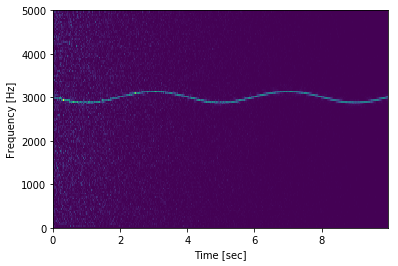

In [120]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

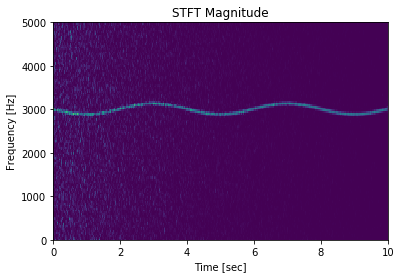

In [121]:
f, t, Zxx = signal.stft(x, fs,)# nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx)**2)#, vmin=0, vmax=amp)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [60]:
#Zxx = np.where(np.abs(Zxx) >= amp/10, Zxx, 0)
_, xrec = signal.istft(Zxx, fs)

In [61]:
x[:int(fs)]-xrec[:int(fs)]

array([  4.44089210e-16,   1.77635684e-15,  -1.11022302e-16, ...,
        -5.41233725e-16,   4.44089210e-16,  -8.88178420e-16])